In [1]:
%matplotlib inline
%load_ext memory_profiler
from bioinf_learn.util import measure_performance
from bioinf_learn.util import plotData

import time
import numpy as np

from eden.converter.graph.gspan import gspan_to_eden
from eden.graph import Vectorizer

In [2]:
graphs = gspan_to_eden( 'http://www.bioinf.uni-freiburg.de/~costa/bursi.gspan' )
vectorizer = Vectorizer( r=2,d=5 )
%time %memit datasetBursi = vectorizer.transform( graphs )

peak memory: 482.39 MiB, increment: 387.71 MiB
CPU times: user 22.9 s, sys: 52 ms, total: 22.9 s
Wall time: 24.5 s


In [16]:
print "Shape: ", datasetBursi.shape
print "Approximate number of non-zero features: ", datasetBursi.nnz / float(datasetBursi.shape[0])
print "Sparsity: ", datasetBursi.nnz / float(datasetBursi.shape[0]) / datasetBursi.shape[1]

Shape:  (4337, 1048577)
Approximate number of non-zero features:  373.168549689
Sparsity:  0.000355880922134


In [3]:
n_neighbors_sklearn = 10
n_neighbors_minHash = 10
returnValuesBursi = measure_performance(datasetBursi, n_neighbors_sklearn, n_neighbors_minHash, 
                                        number_of_hashfunctions=[100, 200, 400, 600, 800, 1000])

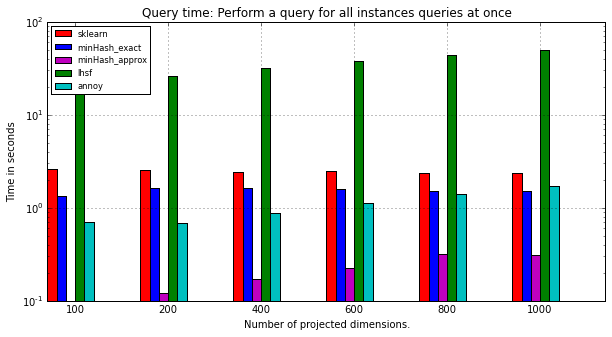

In [5]:
plotData(data=returnValuesBursi[4:9], color=["r", "b", "m", "g", "c"], label=["sklearn", "minHash_exact", "minHash_approx", "lhsf", "annoy"],
        xticks=["100", "200", "400", "600", "800", "1000"], ylabel="Time in seconds", number_of_instances=6,
        xlabel="Number of projected dimensions.",
         number_of_features=1, title='Query time: Perform a query for all instances queries at once')

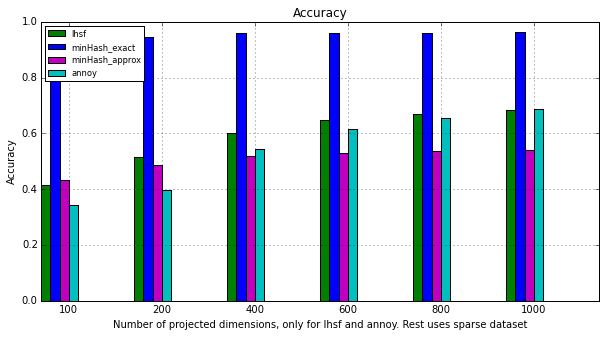

In [7]:
plotData(data=returnValuesBursi[9:], color=["g", "b", "m", "c"], label=["lhsf", "minHash_exact", "minHash_approx", "annoy"],
        xticks=["100", "200", "400", "600", "800", "1000"],
         xlabel="Number of projected dimensions, only for lhsf and annoy. Rest uses sparse dataset",
         ylabel="Accuracy", number_of_instances=6,
        number_of_features=1, title='Accuracy', log=False)

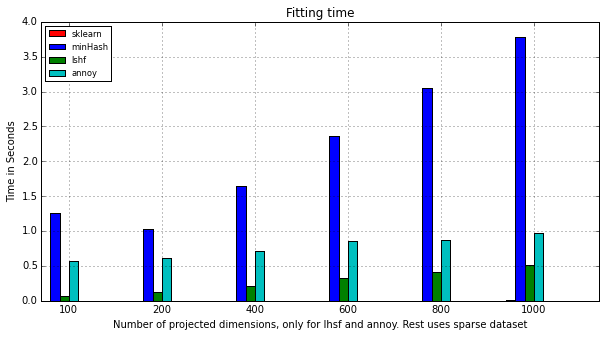

In [9]:
plotData(data=returnValuesBursi[:4], color=["r", "b", "g", "c"], label=["sklearn", "minHash", "lshf", "annoy"],
        xticks=["100", "200", "400", "600", "800", "1000"], 
         xlabel="Number of projected dimensions, only for lhsf and annoy. Rest uses sparse dataset",
         ylabel="Time in Seconds", number_of_instances=6,
        number_of_features=1, title='Fitting time', log=False)

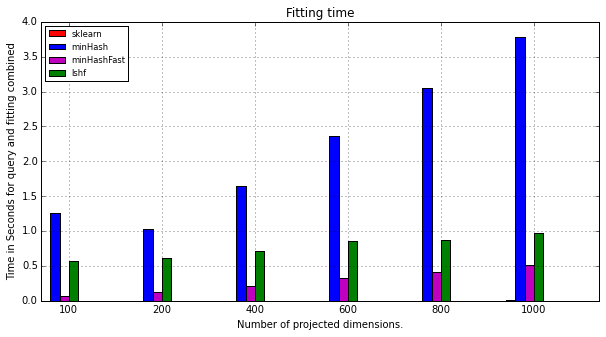

In [11]:
for i in xrange(4):
    
    if i !=2:
        returnValuesBursi[i+4][0] += returnValuesBursi[i][0]
    else:
        returnValuesBursi[i+4][0] += returnValuesBursi[i-1][0]
plotData(data=returnValuesBursi[:4], color=["r", "b","m", "g", "c"], label=["sklearn", "minHash", "minHashFast", "lshf", "annoy"],
        xticks=["100", "200", "400", "600", "800", "1000"], 
         xlabel="Number of projected dimensions.",
         ylabel="Time in Seconds for query and fitting combined", number_of_instances=6,
        number_of_features=1, title='Fitting time', log=False)